<a href="https://colab.research.google.com/github/JINJA-E/fastcampus/blob/main/%EC%B0%B8%EA%B3%A04%EC%9E%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#데이터불러오기
from tensorflow.keras.datasets import imdb
import numpy as np
from keras import models
from keras import layers

(train_data, train_labels), (test_data,test_labels) = imdb.load_data(num_words=10000)
print('train_data : ',train_data.shape)
print('train_labels : ',train_labels.shape)
print('test_data :',test_data.shape)
print('test_labels :',test_labels.shape)

#데이터준비
def vectorize_sequences(sequences,dimension=10000):
  results = np.zeros((len(sequences),dimension))
  for i, sequence in enumerate(sequences):
    results[i,sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

#모델 준비
model = models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

#컴파일
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

#검증세트준비
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

#훈련
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data = (x_val,y_val))

train_data :  (25000,)
train_labels :  (25000,)
test_data : (25000,)
test_labels : (25000,)
Epoch 1/20
30/30 [==============================] - 3s 55ms/step - loss: 0.5182 - accuracy: 0.8012 - val_loss: 0.3991 - val_accuracy: 0.8665
Epoch 2/20
30/30 [==============================] - 1s 42ms/step - loss: 0.3142 - accuracy: 0.9031 - val_loss: 0.3194 - val_accuracy: 0.8786
Epoch 3/20
30/30 [==============================] - 1s 42ms/step - loss: 0.2307 - accuracy: 0.9268 - val_loss: 0.3130 - val_accuracy: 0.8722
Epoch 4/20
30/30 [==============================] - 1s 42ms/step - loss: 0.1814 - accuracy: 0.9429 - val_loss: 0.2728 - val_accuracy: 0.8907
Epoch 5/20
30/30 [==============================] - 2s 53ms/step - loss: 0.1495 - accuracy: 0.9520 - val_loss: 0.2786 - val_accuracy: 0.8870
Epoch 6/20
30/30 [==============================] - 2s 52ms/step - loss: 0.1206 - accuracy: 0.9632 - val_loss: 0.3066 - val_accuracy: 0.8791
Epoch 7/20
30/30 [==============================] - 2s 53ms/st

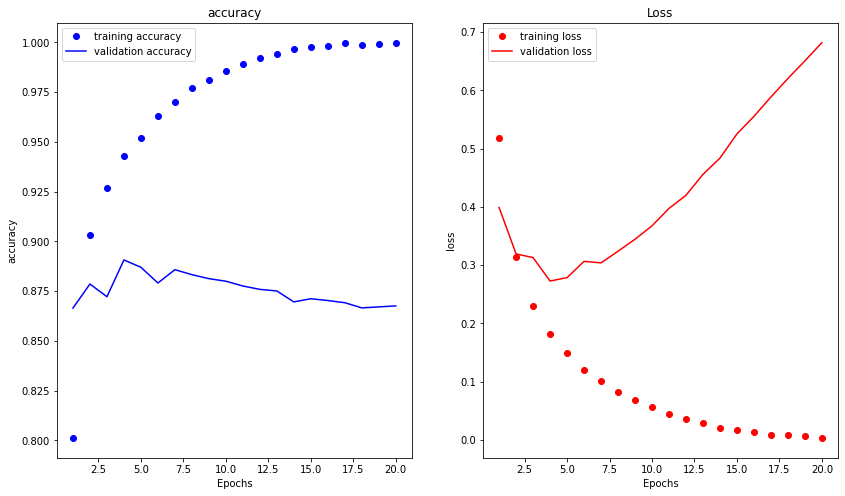

In [13]:
import matplotlib.pyplot as plt

#그래프그리기
history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1,len(loss)+1)  #1부터 20까지

f, ax = plt.subplots(1,2,figsize=(14,8))
ax[0].plot(epochs,acc,'bo',label = 'training accuracy')
ax[0].plot(epochs,val_acc,'b',label = 'validation accuracy')
ax[0].set_title('accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('accuracy')
ax[0].legend()

ax[1].plot(epochs,loss,'ro',label = 'training loss')
ax[1].plot(epochs,val_loss,'r',label = 'validation loss')
ax[1].set_title('Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('loss')
ax[1].legend()

In [14]:
import tensorflow as tf

#모델다시그리기

model = models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

model.fit(partial_x_train,partial_y_train,epochs=4,batch_size=512,validation_data=(x_val,y_val))

Epoch 1/4
30/30 [==============================] - 2s 51ms/step - loss: 0.5402 - accuracy: 0.7801 - val_loss: 0.4080 - val_accuracy: 0.8663
Epoch 2/4
30/30 [==============================] - 1s 41ms/step - loss: 0.3247 - accuracy: 0.8979 - val_loss: 0.3124 - val_accuracy: 0.8863
Epoch 3/4
30/30 [==============================] - 1s 37ms/step - loss: 0.2349 - accuracy: 0.9239 - val_loss: 0.3004 - val_accuracy: 0.8793
Epoch 4/4
30/30 [==============================] - 1s 40ms/step - loss: 0.1865 - accuracy: 0.9399 - val_loss: 0.2749 - val_accuracy: 0.8895


In [15]:
model.evaluate(x_test,y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.2944 - accuracy: 0.8810


[0.2943904399871826, 0.8810399770736694]

In [16]:
model.predict(x_test)

array([[0.25505382],
       [0.99933046],
       [0.9308046 ],
       ...,
       [0.12849179],
       [0.17564884],
       [0.5587732 ]], dtype=float32)